## EDA for Voce Activity Detection

In [1]:
!pip install silero-vad

In [2]:
from silero_vad import load_silero_vad, read_audio, get_speech_timestamps
model = load_silero_vad()
wav = read_audio('D:\\telelyzerv2\\experiment\\exp_data\\53501fef-ef8b-4a08-b171-bcd7846ea639.mp3')
speech_timestamps = get_speech_timestamps(
  wav,
  model,
  return_seconds=True,  # Return speech timestamps in seconds (default is samples)
)

In [10]:
data = {
    "start": [i['start'] for i in speech_timestamps], 
    "end": [i['end'] for i in speech_timestamps], 
    "duration": [i['end'] - i['start'] for i in speech_timestamps]
}

In [11]:
import pandas as pd

In [12]:
df = pd.DataFrame(data)

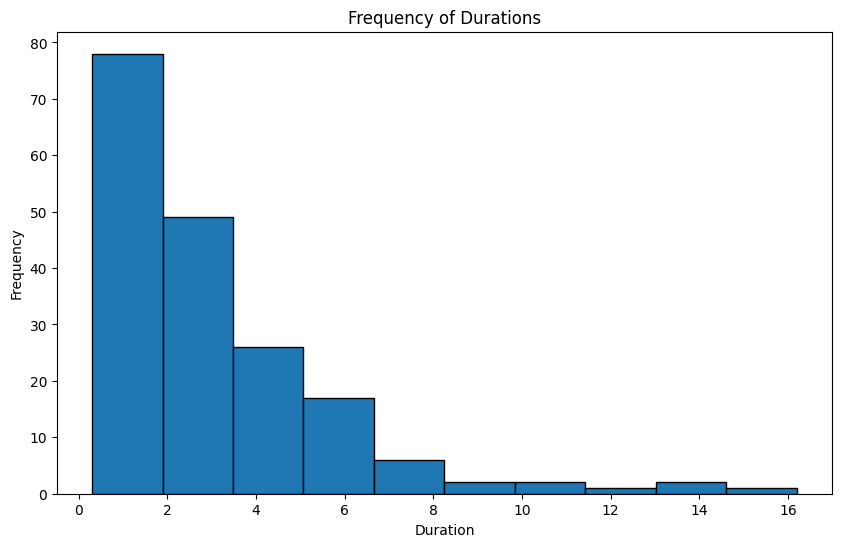

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataframe
# df = pd.DataFrame({'duration': [5, 15, 10, 20, 15, 10, 30, 25, 15, 5, 10, 15]})

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['duration'], bins=10, edgecolor='black')
plt.title('Frequency of Durations')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()


In [19]:
for index, row in df.iterrows():
    if index == 0:
        df.at[index, 'pause'] = 0
    else:
        pause = df.at[index, 'start'] - df.at[index-1, 'end']
        df.at[index, 'pause'] = int(pause)

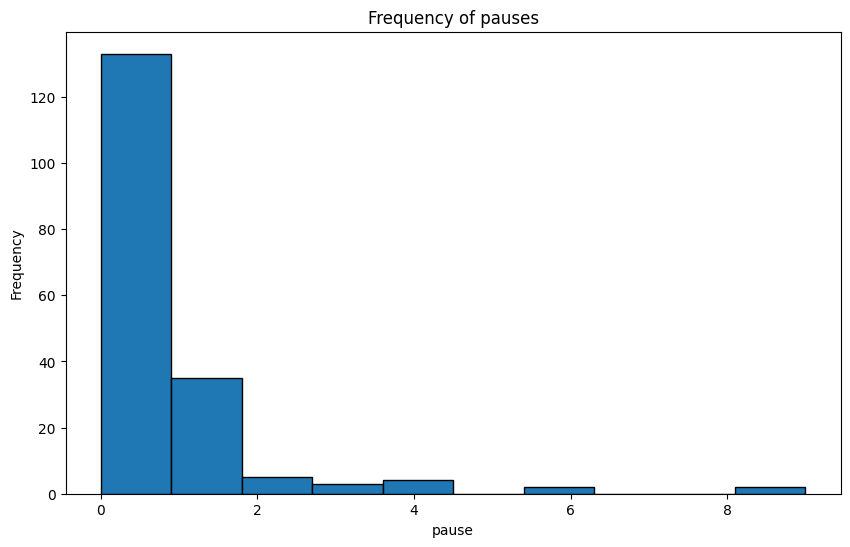

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataframe
# df = pd.DataFrame({'duration': [5, 15, 10, 20, 15, 10, 30, 25, 15, 5, 10, 15]})

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['pause'], bins=10, edgecolor='black')
plt.title('Frequency of pauses')
plt.xlabel('pause')
plt.ylabel('Frequency')
plt.show()


## Creating a dataset of merged audio files

In [22]:
processed_chunks = []

for index, row in df.iterrows():
    if len(processed_chunks) == 0:
        processed_chunks.append({
            "start": row['start'], 
            "end": row['end'], 
            "duration": row['duration']
        })

    elif len(processed_chunks) > 0 and row['pause'] < 4:
        processed_chunks[-1]['end'] = row['end']
        processed_chunks[-1]['duration'] = processed_chunks[-1]['end'] - processed_chunks[-1]['start']
    elif row['pause'] >= 4:
        processed_chunks.append({
            'start': row['start'],
            "end": row['end'], 
            "duration": row['duration']
        })


In [25]:
processed_chunks_df = pd.DataFrame(processed_chunks)

In [26]:
processed_chunks_df

,start,end,duration
0,1.8,77.1,75.3
1,86.3,95.7,9.4
2,104.8,122.2,17.4
3,126.5,136.2,9.7
4,142.3,143.6,1.3
5,149.6,149.9,0.3
6,154.2,529.1,374.9
7,534.0,631.9,97.9
8,636.6,719.1,82.5


In [38]:
processed_chunks_df.describe()

,start,end,duration
count,9.000000,9.000000,9.000000
mean,215.122222,289.422222,74.300000
std,216.437270,258.393928,119.065812
min,1.800000,77.100000,0.300000
25%,104.800000,122.200000,9.400000
50%,142.300000,143.600000,17.400000
75%,154.200000,529.100000,82.500000
max,636.600000,719.100000,374.900000


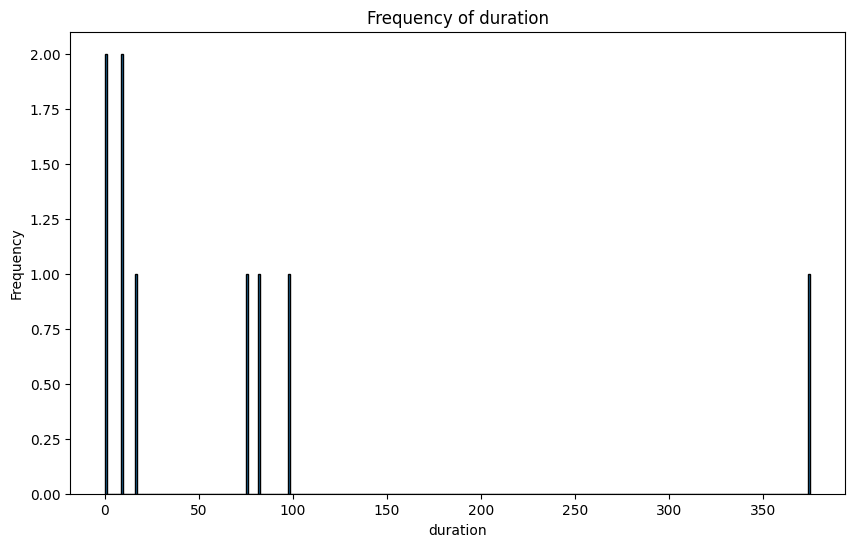

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataframe
# df = pd.DataFrame({'duration': [5, 15, 10, 20, 15, 10, 30, 25, 15, 5, 10, 15]})

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(processed_chunks_df['duration'], bins=350, edgecolor='black')
plt.title('Frequency of duration')
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.show()
